## PREREQUISITES

#### Import Libraries

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import re

#### Import Modules

In [3]:
%load_ext autoreload
%autoreload 2

# Build an absolute path from this notebook's parent directory
package_path = os.path.abspath(os.path.join('../src'))

# # Add to sys.path if not already present
if package_path not in sys.path: 
    sys.path.insert(0, package_path)


In [4]:
from config import DATA_DIR 
from dataingestion import DataIngestion
from logger import logging

2025-04-22 07:00:40.478 | INFO     | config:<module>:13 - PROJ_ROOT path is: /home/edu/DataScience/CapstoneProjects/RecSys/recommender


/home/edu/DataScience/CapstoneProjects/RecSys/recommender/notebooks
/home/edu/DataScience/CapstoneProjects/RecSys/recommender/logs/04-22-2025_070040.log
/home/edu/DataScience/CapstoneProjects/RecSys/recommender/notebooks


#### Data Ingestion

In [5]:
data_in = DataIngestion()
df, raw_data_path = data_in.initiate_data_ingestion()

In [6]:
# Testing: - read file

df = pd.read_csv('../data/raw/amazon_2023/Amazon-Reviews.csv', index_col=False)

In [7]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## DATA CLEANING

In [8]:
logging.info(f'Dataset shape before cleaning step: {df.shape}')
df.shape

(1465, 16)

In [9]:
# Check columns' data types and count 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
# Check null columns

df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [11]:
# Drop empty rows

df.dropna(how='any', inplace=True)
df.shape

(1463, 16)

In [12]:
# Drop duplicates

df = df.drop_duplicates(subset=['product_id'])
df.shape

(1349, 16)

In [13]:
# Checkpoint: Ensure no more duplicates

assert df.product_id.duplicated().sum()== 0 , "Duplicate product_ids still present"

In [14]:
# Transform the numeric columns

numeric_columns = [ 'discounted_price',  'actual_price', 'discount_percentage', 'rating' ,'rating_count']

for col in numeric_columns:
    df[col] = df[col].str.translate(str.maketrans({'₹': None, ',': None, '%': None, '/':None, '|':None}))

    # Coerce and put NaN for plain char/string entries
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
    # df[col].dropna(how='any', axis=0, inplace=True)

    df[col] = df[col].astype('float')

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [15]:
# Verify the transformation result for  numeric columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1349 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1349 non-null   object 
 1   product_name         1349 non-null   object 
 2   category             1349 non-null   object 
 3   discounted_price     1349 non-null   float64
 4   actual_price         1349 non-null   float64
 5   discount_percentage  1349 non-null   float64
 6   rating               1348 non-null   float64
 7   rating_count         1349 non-null   float64
 8   about_product        1349 non-null   object 
 9   user_id              1349 non-null   object 
 10  user_name            1349 non-null   object 
 11  review_id            1349 non-null   object 
 12  review_title         1349 non-null   object 
 13  review_content       1349 non-null   object 
 14  img_link             1349 non-null   object 
 15  product_link         1349 non-null   object

In [16]:
# [Checkpoint]: Assert numeric columns' dtypes should be numeric, specifically float32

import numbers

for col in numeric_columns:
    # assert str(df[col].dtype) == 'float32', f'Column {col} conversion to float32 failed!'
    assert issubclass(df[col].dtype.type, numbers.Number), f'Column {col} conversion to float32 failed!'

In [17]:
# Check for null columns 

df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [18]:
# # Test- Show the null row

# df[df.rating.isnull()]

In [19]:
# Drop empty rows

df.dropna(how='any', axis=0, inplace=True)
df.shape

(1348, 16)

In [20]:
# [Checkpoint] : Ensure no more null columns

assert ((df.isna().sum().unique()[0] == 0) & (len(df.isna().sum().unique()) == 1)), 'Null values exists! Check dataframe.'

## EDA

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Statistics for numeric columns using describe()

df.select_dtypes(exclude='object').describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,3310.267188,5700.506395,46.662463,4.091988,17656.847923
std,7180.901370,11229.356113,21.607716,0.295139,42158.843602
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,349.000000,899.000000,31.000000,3.900000,1107.500000
50%,899.000000,1795.000000,49.000000,4.100000,4740.000000
75%,2184.000000,4592.500000,62.000000,4.300000,16051.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


<Figure size 1000x1000 with 0 Axes>

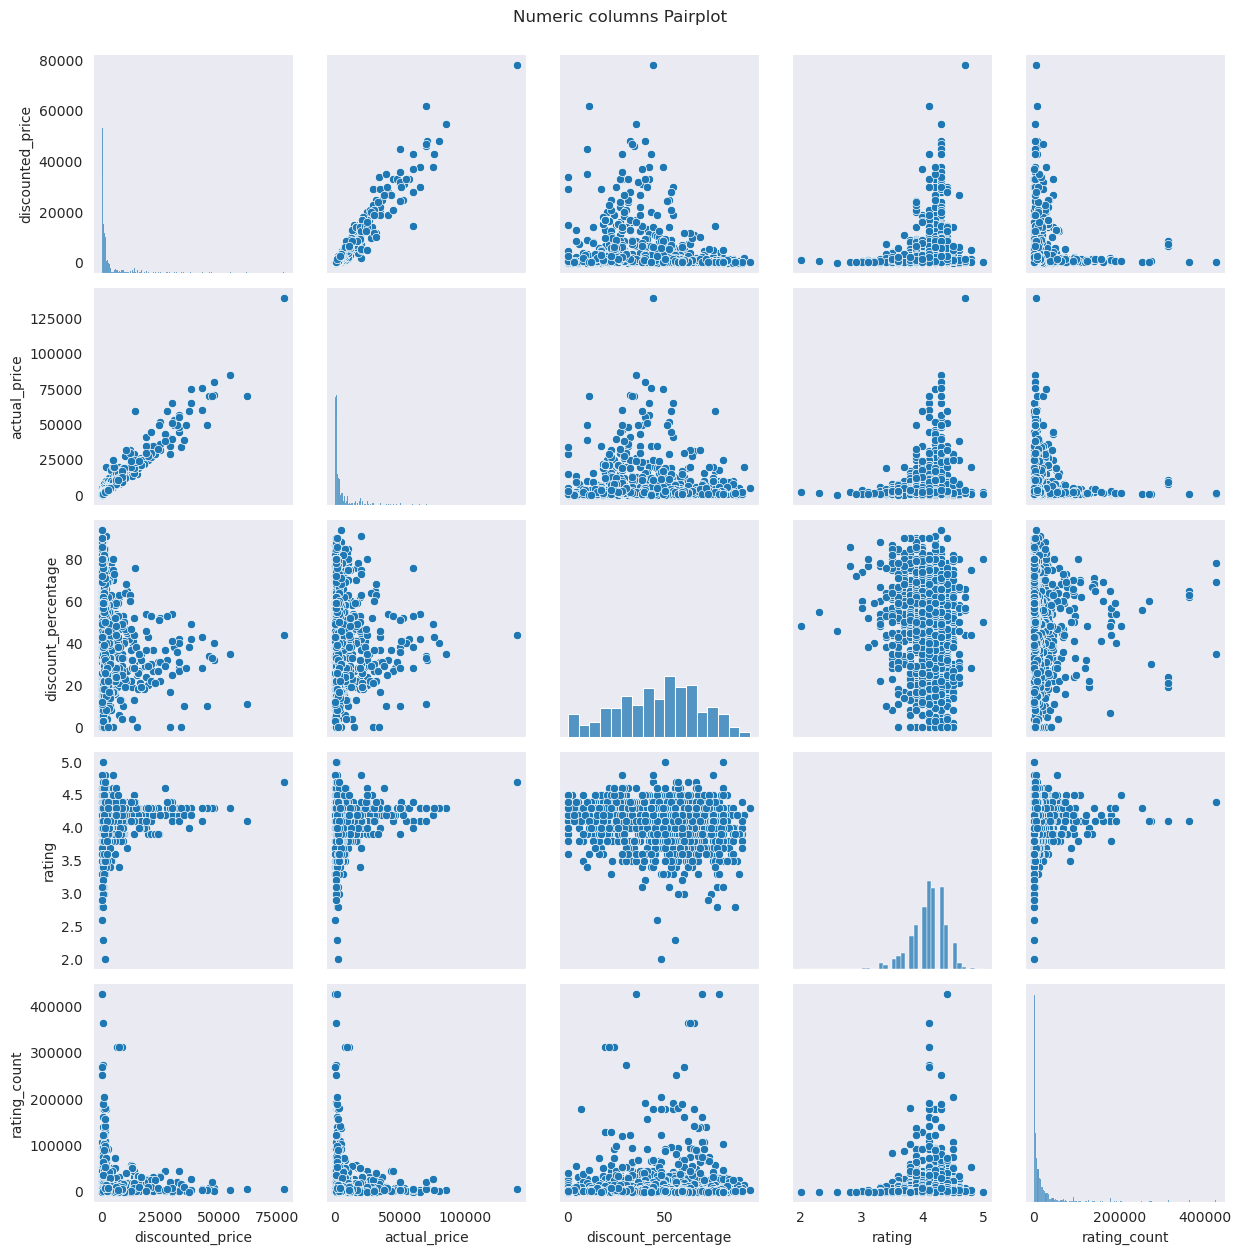

In [23]:
# Create a pairplot for all numeric columns

sns.set_style('dark', {'axes.grid':False})
plt.figure(figsize=(10,10))
sns.pairplot(df[numeric_columns]).fig.suptitle('Numeric columns Pairplot', y=1.0)
plt.tight_layout()
plt.show()

#### Outlier Detection

In [24]:
# UDF for plotting columns using a boxplot

def show_boxplot(data:pd.DataFrame, col:str, title:str) -> None:
    plt.figure(figsize=(5,3))
    box_rating = sns.boxplot(data=data, x=col)
    box_rating.set_title(title)
    # plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

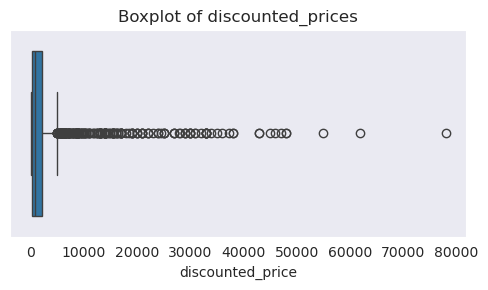

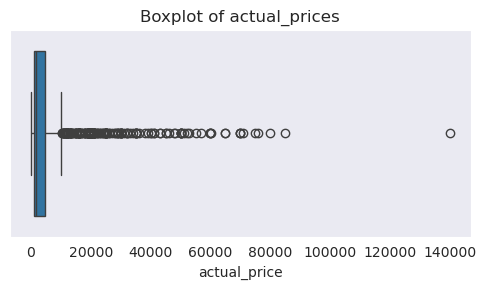

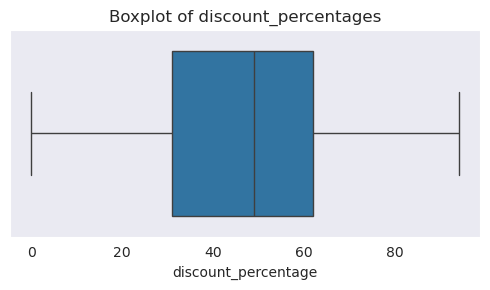

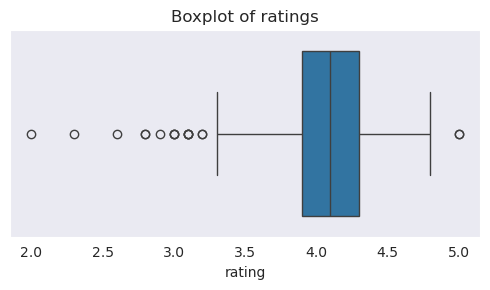

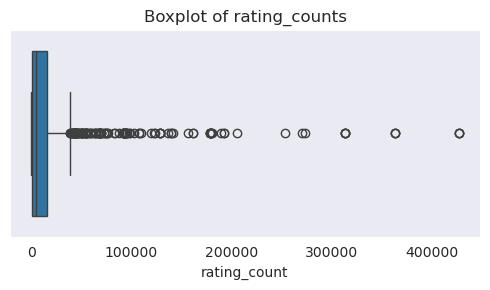

In [25]:
# Check for outliers

for col in numeric_columns:

    title = f'Boxplot of {col}s'
    show_boxplot(df, col, title)

In [26]:
# UDF: Function for extracting outliers and non-outliers from a dataframe

def process_outliers(data_df: pd.DataFrame, col: str, is_outlier = True) -> pd.DataFrame:
    '''Desc: Custom function for extracting outliers or non-outliers depending on the is_outlier argument.
    
    Input: 
        data_df: pd.DataFrame - dataframe to process
        col: str - column to process
        is_outlier: bool - If True (by default) will extract outliers; otherwise, non-outliers'''
    
    q1 = data_df[col].quantile(0.25)
    q3 = data_df[col].quantile(0.75)
    iqr = q3 - q1
    if is_outlier:
        result = data_df[((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
    else:
        result = data_df[~((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
        
    return result

In [27]:
# Highly rated items that are outliers

df_ol = process_outliers(df, 'actual_price', is_outlier=True)
df_ol.sort_values('actual_price', ascending=False)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,44.0,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...
255,B0BC8BQ432,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",54990.0,85000.0,35.0,4.3,3587.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AHY6AK5LXBTGXDDXSU57ISMDW55Q,AGULFHMPCHCL32WCI...","UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud","R2G4T57OLXDVPL,R3IQ8PWVTWENBY,RH6UHEBP622FT,R3...",Good TV for the price. (But my experience was ...,",Screen quality is good.It's been a month I bo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/VU-inches-GloLED-Google-...
283,B0B3XXSB1K,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",47990.0,79990.0,40.0,4.3,1376.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AFCWL3MX7BP2ZUDD37MEAENZDQ2A,AGGFXDLCFZMTLJJDR...","Raj Mohammed,Samson,Haroon sayeed,P Imran Khan...","RC3ZLDRM8GA9T,RMDN4PSDM8SKK,R1YFAMDJ7P0SY3,R2W...","Love Amazon but lg is misleading,Amazing produ...",There's no magic remote and lg should include ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LG-inches-Ultra-55UQ7500...
1354,B09NS5TKPN,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",42990.0,75990.0,43.0,4.3,3231.0,Split AC with inverter compressor: variable sp...,"AGBYWFEGGX6QM6XB3ZPQADKKXAHA,AGU6LHFOEHAFE34AC...","ABHISHEK KUMAR,Nageswar,Denzil,krushna,Brijesh...","R2GZHWNGVMBJFG,R3L27H7N1WH5BG,R200QONLM29B4B,R...","Very nice,Efficient but little costly.,Good pr...","Very nice,Efficiency is good , cost is little ...",https://m.media-amazon.com/images/I/21ywp-zfTj...,https://www.amazon.in/LG-Convertible-Anti-Viru...
568,B08VB57558,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics|Mobiles&Accessories|Smartphones&Ba...,37990.0,74999.0,49.0,4.2,27790.0,5G Ready powered by Qualcomm Snapdragon 865 Oc...,"AEGEOVAES62OFGQTSPSDSQ5U7SHA,AGMBYTP5MS3JCQZ2N...","Mohammed Suhail,GVR","R3R5DS04EXELTJ,R3JBXYOBYRX0A8","WORTH BUY ! THE BEST,Good for the price.",It's been 15 days since i using the device ext...,https://m.media-amazon.com/images/I/41ezRvTwca...,https://www.amazon.in/Samsung-Galaxy-Cloud-128...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,B08N6P8G5K,INALSA Air Fryer Digital 4L Nutri Fry - 1400W ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,6790.0,10995.0,38.0,4.5,3192.0,Oil-free fryer: Fryer with Air Crisp Technolog...,"AGYYUWOUJKKTMI5CXTJHL6S5YKXQ,AFNA3KTCXDH5PVLFM...","Varun Dubey,Vanessa,sowmya varukuru,Placeholde...","REVG93OC7J7E7,R3P1VSN1MLDAC8,R27M4MEXR2CQKP,RL...","Nice product,Absolutely wonderful! Efficient a...","Nice purchase, Really liked it..,Really easy t...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Inalsa-Digital-Fryer-Nut...
1321,B01892MIPA,AO Smith HSE-VAS-X-015 Storage 15 Litre Vertic...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",7349.0,10900.0,33.0,4.2,11957.0,Type: Storage ; Capacity: 15 Litres; Wattage: ...,"AG3PLRKXVXLYQ7YHOIU4QVWWFBAQ,AHRU7JSVBHVEBWI2H...","VINAY,uday patil,Amazon Customer,giri raj sing...","R1YVS42PE19S0D,R3DONAXVXXHGDY,R6PIB7C4JS214,R1...","Nice Gyser,Good child I am say,Great product i...",It gives hot water but only after 25 min of 

In [28]:
df_ol.category.value_counts()

category
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                            60
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                     60
Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|StorageWaterHeaters                          9
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers                     9
Electronics|WearableTechnology|SmartWatches                                                               9
Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions                                          6
Home&Kitchen|Heating,Cooling&AirQuality|AirPurifiers|HEPAAirPurifiers                                     4
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|Wet-DryVacuums      3
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers                        3
Home&Kitchen|Heatin

#### Feature correlation

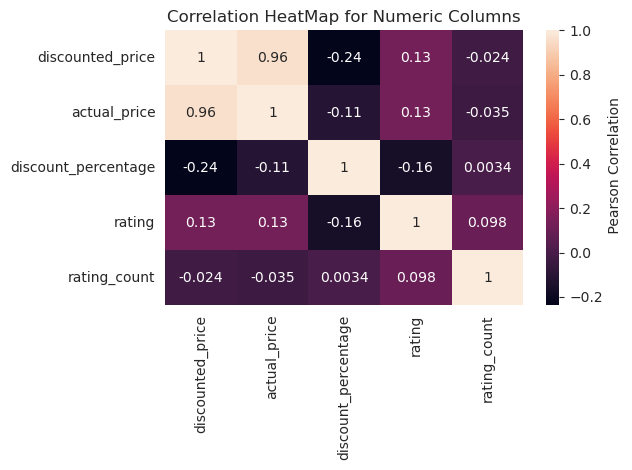

In [29]:


correlation_matrix = df[numeric_columns].corr()
heatmap = sns.heatmap(correlation_matrix,  annot=True, cbar_kws={'label':' Pearson Correlation'})
heatmap.set_title('Correlation HeatMap for Numeric Columns')
plt.tight_layout()
plt.show()

> There is very little correlation between the ratings and actual/discounted price.

In [30]:
df.shape

(1348, 16)

###  Solution to Cold-Start Problem:

#### 1. Recommending Top Categories

In [31]:
from inspect import signature
from collections import Counter

In [32]:
df.category.value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          159
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|WearableTechnology|SmartWatches                                                                                 62
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               60
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                51
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

In [33]:
# UDF: count texts in a list

def count_list(col: pd.Series) -> Counter:
    '''Desc:
        Uses collections.Counter function to count elements in a list.
        If using a column, make sure to pass a LIST of strings.
    Input: Pandas.Series object
    Return: collections.Counter object'''
    
    return Counter( e for entries in col for e in entries)

In [34]:
# Count and extract all categories

# df['categories'] = df['category'].apply(lambda x: x.split('|')) 
l_categories = df['category'].apply(lambda x: x.split('|')) 

categories = count_list(l_categories)
type(categories)
print(f'There are {len(categories)} in categories')
categories.most_common(10)

There are 317 in categories


[('Electronics', 490),
 ('Home&Kitchen', 447),
 ('Computers&Accessories', 373),
 ('Kitchen&HomeAppliances', 307),
 ('Accessories&Peripherals', 305),
 ('Cables', 190),
 ('SmallKitchenAppliances', 181),
 ('Cables&Accessories', 165),
 ('USBCables', 159),
 ('HomeTheater,TV&Video', 156)]

In [35]:
# Save categories count to a dataframe

df_categories = pd.DataFrame( {'category':  [c[0] for c in categories.items()], 'count': [c[1] for c in categories.items()]} )
df_categories = df_categories.sort_values('count', ascending=False)

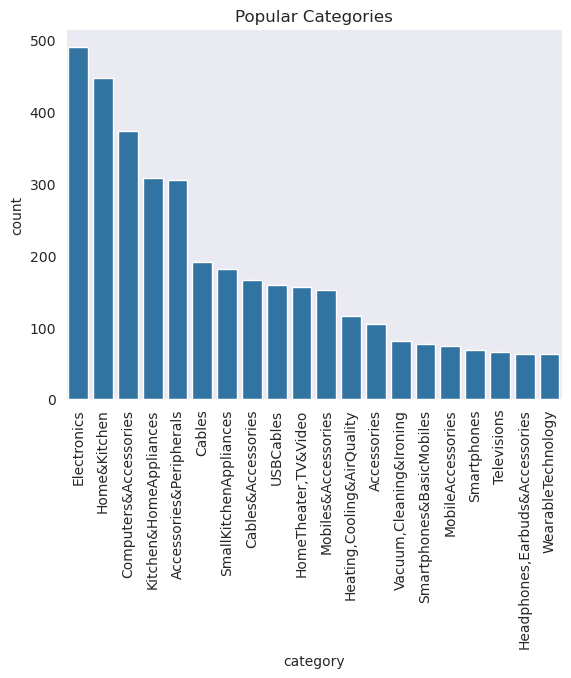

In [36]:
# Plot results

bar_categories = sns.barplot(data=df_categories.sort_values('count', ascending=False).head(20), x='category', y='count')
bar_categories.set_title('Popular Categories')
plt.xticks(rotation=90)
plt.show()

#### 2. Recommending Top-Rated Products per (chosen) category

In [37]:
# UDF: Custom function to filter dataframe by selected category

def filter_by_category(df_data: pd.DataFrame, category: str) -> pd.DataFrame:
    '''Desc:
        Drill down dataframe by the desired category.
    Input: df_data: pd.DataFrame
    Return: df_filtered: pd.DataFrame'''


    df_filtered = df_data[df_data['category'].str.contains(category)]
    return df_filtered

In [38]:
# Input Block: Select desired category using the rank (index from prev. step).

# rank = input('Select rank:')

# Dummy Test: Use #18 for earbuds/headphones category. 
rank = 18

# Retrieve and display the category based on rank

selected_category = df_categories.iloc[int(rank),:].category
print(f'Selected Category: {selected_category}')

Selected Category: Headphones,Earbuds&Accessories


In [39]:
# Execute filter_by_category function

df_filtered_category = filter_by_category(df, selected_category)

In [40]:
# Testing :Check if Counter object returns the same number of results from the selected category]

test_l_filtered = df_filtered_category['category'].apply(lambda x: x.split('|'))
test_cats = count_list(test_l_filtered)

In [41]:
# Checkpoint: Number of entries in counter result must equal the number of rows in filtered dataframe 

assert test_cats.get(selected_category) == df_filtered_category.shape[0], "Results are not equal!"

In [42]:
df_filtered_category.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
347,B01DEWVZ2C,"JBL C100SI Wired In Ear Headphones with Mic, J...","Electronics|Headphones,Earbuds&Accessories|Hea...",599.0,999.0,40.0,4.1,192590.0,JBL Signature Sound|Lightweight and Comfortabl...,"AFE54I72EV2YOL6POJCHHP3Q5NWA,AFKLES3QOCRLIMJWH...","Sunny J.,Praveen Pavitrhran,nitesh,Yadav,vansh...","R2NB2K5XC70FKP,R3623Q21H3MKP6,R1XVC6NEYU3ZHV,R...","Good maybe okay,Defective Product Delivered,Am...",The quality is not upto mark for the price pai...,https://m.media-amazon.com/images/I/31NnmYempP...,https://www.amazon.in/JBL-C100SI-Ear-Headphone...
349,B08D77XZX5,PTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...,"Electronics|Headphones,Earbuds&Accessories|Hea...",599.0,2499.0,76.0,3.9,58162.0,Ergonomic Magnetic Earbuds; Secure-fit; Sweat ...,"AH4OX4YZN7FYK5EGLIGSPL7V5GEA,AF3P7GAMRCSCUNVGI...","Suleman saifi,Nidhin Nair,RAHUL MEHRA,Uroosa s...","R2RBF2BGJRO7H2,R1OF0G9O7Z6VSU,R30F23SQTDLJPU,R...","this is good product.,Too much bass for my lik...",p tron neckband is good product. when it new s...,https://m.media-amazon.com/images/I/41KBaLUTYH...,https://www.amazon.in/Tangentbeat-Bluetooth-He...


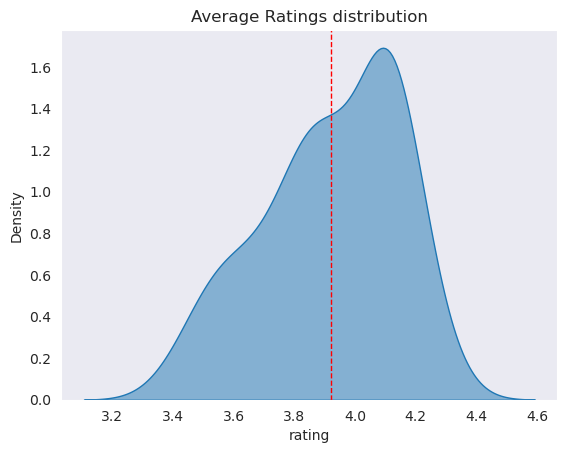

In [48]:
# Plot mean rating distribution

sns.kdeplot(data=df_filtered_category, x='rating', fill=True, alpha=0.5)
plt.title('Average Ratings distribution')
plt.axvline(x=df_filtered_category['rating'].mean(), ls='--', linewidth=1, color='red')
plt.show()

In [49]:
# Input Block: Specify the number of Top Results to display

# n_result = input('Enter number of results to display')

# Dummy Test: Use 10
n_result = 10
print(f'Chosen no. of results to display: {n_result}')

Chosen no. of results to display: 10


<div class="alert alert-block alert-info">
The Bayesian Average of the ratings would be a more reliable criteria; however, the rating column already corresponds to the mean or aggregated ratings from from multiple raters/reviewers. As this is the case, the columns, rating and rating count can be used to determine the top rated items per the chosen category. 
</div>

In [50]:
# Show results: Top products from the chosen category

df_toprated = df_filtered_category.sort_values(by=['rating', 'rating_count'], ascending=[False,False])
df_toprated[['product_id', 'product_name', 'rating', 'rating_count', 'category']].head(int(n_result))

,product_id,product_name,rating,rating_count,category
787,B07DKZCZ89,"Gizga Essentials Earphone Carrying Case, Multi...",4.3,15032.0,"Electronics|Headphones,Earbuds&Accessories|Cases"
1015,B078W65FJ7,boAt BassHeads 900 On-Ear Wired Headphones wit...,4.2,91188.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
912,B08MTLLSL8,boAt Bassheads 102 Wired in Ear Earphones with...,4.2,76042.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
883,B0873L7J6X,"Infinity (JBL Glide 510, 72 Hrs Playtime with ...",4.2,42775.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
466,B01F25X6RQ,Samsung Ehs64 Ehs64Avfwecinu Hands-Free Wired ...,4.2,31539.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
523,B01F262EUU,Samsung Original EHS64 Wired in Ear Earphones ...,4.2,31539.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
939,B0B5GJRTHB,Wecool Moonwalk M1 ENC True Wireless in Ear Ea...,4.2,2284.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
620,B07QZ3CZ48,boAt BassHeads 122 Wired Earphones with Heavy ...,4.2,206.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
352,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713.0,"Electronics|Headphones,Earbuds&Accessories|Hea..."


## PRE-PROCESSING

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Content-Based Filtering: Find Similar Products

In [52]:
# Split the words in categories column by replacing '|' with ' '

df.category = df.category.str.replace('|', ' ')
df.category.value_counts()

category
Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables                                          159
Electronics Mobiles&Accessories Smartphones&BasicMobiles Smartphones                                                        68
Electronics WearableTechnology SmartWatches                                                                                 62
Electronics HomeTheater,TV&Video Televisions SmartTelevisions                                                               60
Electronics Headphones,Earbuds&Accessories Headphones In-Ear                                                                51
                                                                                                                          ... 
Electronics Cameras&Photography Accessories Batteries&Chargers BatteryChargers                                               1
Computers&Accessories NetworkingDevices DataCards&Dongles                                             

In [53]:
# New column: feature_group = product_id, product_name, category, (TBD: about_product)

selected_features = ['product_id', 'product_name', 'category']

df['feature_group'] = df[selected_features].agg(' '.join, axis=1)
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,feature_group
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1 Wayona Nylon Braided USB to Lightni...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories Accessories&Peripherals ...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,B098NS6PVG Ambrane Unbreakable 60W / 3A Fast C...


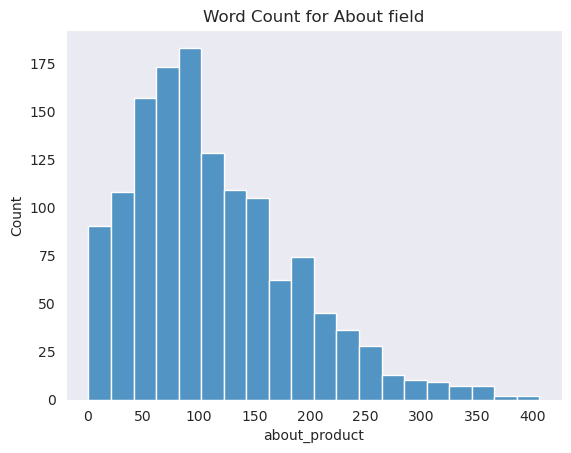

In [54]:
# Distribution of word count for About column

about_word_count = df.about_product.str.split().str.len()

sns.set_style('dark')
about_count = sns.histplot(x=about_word_count, bins=20)
about_count.set_title('Word Count for About field')
plt.show()

#### Stemming and Tokenization

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/edu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/edu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Testing purposes - flag token
flag_token = False

In [57]:
# Stemming and Tokenization instances

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [58]:
# UDF: Custom function for tokenization of texts

def tokenizer(txt):

    global flag_token
    word_tokens = nltk.word_tokenize(txt)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_text = [stemmer.stem(text) for text in filtered_sentence]
    flag_token = True
    return ' '.join(filtered_text)

In [59]:
# Apply custom tokenizer to feature_group column

df['feature_group'] = df['feature_group'].apply(lambda x: tokenizer(x))

In [60]:
#deletable - preview tokenized feature_group
df['feature_group'].values

array(['b07jw9h4j1 wayona nylon braid usb lightn fast charg data sync cabl compat iphon 13 , 12,11 , x , 8 , 7 , 6 , 5 , ipad air , pro , mini ( 3 ft pack 1 , grey ) comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'b098ns6pvg ambran unbreak 60w / 3a fast charg 1.5m braid type c cabl smartphon , tablet , laptop & type c devic , pd technolog , 480mbp data sync , quick charg 3.0 ( rct15a , black ) comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'b096msw6ct sounc fast phone charg cabl & data sync usb cabl compat iphon 13 , 12,11 , x , 8 , 7 , 6 , 5 , ipad air , pro , mini & io devic comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       ...,
       'b009p2lil4 bajaj majesti rx10 2000 watt heat convector room heater ( white , isi approv ) home & kitchen heat , cool & airqual roomheat heatconvector',
       'b00j5dycca havel ventil air dsp 230mm exhaust fan ( pista green ) home & kitchen heat , cool & airqu

#### Calculate Cosine Similarity

In [61]:
vectorizer = TfidfVectorizer(analyzer='word',stop_words='english')
feature_vectors = vectorizer.fit_transform(df['feature_group'].values)

In [62]:
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.31753555 0.6540123  ... 0.         0.03676464 0.        ]
 [0.31753555 1.         0.35307213 ... 0.         0.         0.0087757 ]
 [0.6540123  0.35307213 1.         ... 0.         0.03593978 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.10058787 0.05404089]
 [0.03676464 0.         0.03593978 ... 0.10058787 1.         0.02952754]
 [0.         0.0087757  0.         ... 0.05404089 0.02952754 1.        ]]


In [63]:
similarity.shape

(1348, 1348)

#### Implement Similar Products Recommendation

In [ ]:
# Input block: Set query using product name and the desired number of results to be recommended

# product_name = input('Input Product Name: ')
# n_result = input('Input number of products to show: ')


# Dummy Test: Use below values
product_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
n_result = 5

In [94]:
# UDF: get recommendations

def recommend_similar_products(product_name: str, cos_sim: np.array, n_result: int = 1):

    idx = None
    idx = df[df['product_name'] == product_name].index[0]
    # idx = df[df['product_name'].str.contains(product_name, na=False)].index[0]
    
    if idx.size > 0:
   
        distances = sorted(list(enumerate(cos_sim[idx])), reverse=True, key=lambda x:x[1])

        similar_items = []
        
        for p_id in distances[1:(n_result+1)]:
            
            similar_items.append({'id': df.iloc[p_id[0]].product_id, 'name': df.iloc[p_id[0]].product_name})
        
    else:
        print('NO RECOMMENDATIONS FOUND!')
    return similar_items

In [95]:
# Recommend Similar Products

list_recos = recommend_similar_products(product_name, similarity, n_result)


In [96]:
# Convert disctionary to dataframe

df_recos = pd.DataFrame(list_recos)
df_recos

,id,name
0,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...
1,B07JGDB5M1,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...
2,B07JH1CBGW,Wayona Nylon Braided Usb Syncing And Charging ...
3,B07JH1C41D,Wayona Nylon Braided (2 Pack) Lightning Fast U...
4,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...


In [ ]:
# Save results to a csv file

reco_file = 'similar_items.csv'

if flag_token:
    reco_file = 'TKN_'+ reco_file
df_recos.to_csv(f'../data/processed/{reco_file}')

### Item-Based Collaborative Filtering 

In [69]:
# Create a list of all values for user_name, and user_id.

cols_user = ['user_name', 'user_id']

for col in cols_user:
    df[col] = df[col].apply(lambda x: x.split(',')) 
df.shape

(1348, 17)

In [70]:
# Testing
df[df['product_id'] == 'B09NJN8L25']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,feature_group
44,B09NJN8L25,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,Computers&Accessories Accessories&Peripherals ...,59.0,199.0,70.0,4.0,9378.0,Micro USB charging cable for android phones an...,"[AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA, AE55KTFVNXYFD5F...","[$@|\|TO$|-|, Sethu madhav, Akash Thakur, Burg...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31v7NnnAIt...,https://www.amazon.in/FLiX-Charging-480Mbps-De...,b09njn8l25 flix ( beetel usb micro usb pvc dat...


In [71]:
# ​​UDF: Function to pad lists to the same length

def pad_lists(row: pd.Series)-> pd.Series:
    max_len = max(len(row['user_id']), len(row['user_name']))
    row['user_id'] += [None] * (max_len - len(row['user_id']))
    row['user_name'] += [None] * (max_len - len(row['user_name']))
    return row


In [72]:
# Apply the padding function to each row

df_exp = df.apply(pad_lists, axis=1)

In [73]:
# Explode both columns

df_exp = df_exp.explode(cols_user)
df_exp.shape

(10597, 17)

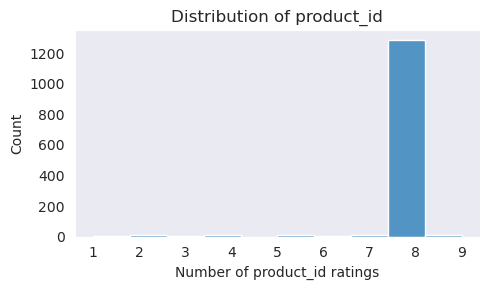

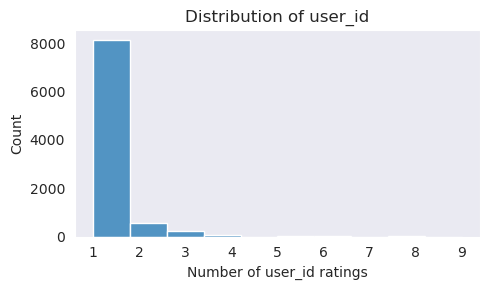

In [74]:
# Check the distribution of ratings to help decide the threshold to keep - What's the min no. of ratings for a product to be recommended to user? 8+ since this is the majority?

cols_of_interest = ['product_id', 'user_id']

for col in cols_of_interest:
    plt.figure(figsize=(5,3))
    df_vc = df_exp[col].value_counts(ascending=False).reset_index()
    sns.histplot(data=df_vc, x='count', bins=10)
    plt.xlabel(f'Number of {col} ratings')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-warning">
Align with business on what threshold to set: 

- Minimum no. of ratings that a product should have
- Minimum no. of ratings that a user has provided

</div>

In [ ]:
# Input block: Set threshold values

# Dummy Test: Set threshold values

# Set num of ratings threshold for products
n_threshold_prod = 8

# Set num of ratings threshold for users
n_threshold_user = 1

#### Sparse Matrix for Ratings

In [76]:
# Prepare Matrix using pivot_table

df_pvt = df_exp.pivot_table(index='product_id', columns='user_id', values='rating')
df_pvt.fillna(0, inplace=True)
df_pvt.shape

(1348, 9034)

#### Filter ratings by product_id

In [77]:
# Aggregate ratings by product_id

gby_prod_ratings = df_exp.groupby('product_id')['rating'].agg('count')

In [78]:
# Get indices of product_id with ratings >= product threshold

idx_above_th_prod = gby_prod_ratings.loc[gby_prod_ratings >= n_threshold_prod].index
df_pvt_reduced = df_pvt.loc[idx_above_th_prod, :]
df_pvt_reduced.shape

(1295, 9034)

In [79]:
# Checkpoint: Pivot table columns should match result of above threhshold df columns

assert df_pvt.shape[1] == df_pvt_reduced.shape[1], "No of columns do not match. Check again"

#### Filter ratings by user_id

In [80]:
# Aggregate ratings by user_id

gby_user_ratings = df_exp.groupby('user_id')['rating'].agg('count')

In [81]:
# Get indices of user_id with ratings >= user threshold

idx_gby_th_user = gby_user_ratings.loc[gby_user_ratings >= n_threshold_user ].index
df_pvt_final = df_pvt_reduced.loc[:, idx_gby_th_user]
df_pvt_final.shape


(1295, 9034)

In [82]:
# Checkpoint: Pivot table rows should match result of above threshold df rows

assert df_pvt_reduced.shape[0] == df_pvt_final.shape[0], "No of rows do not match. Check again!"

### Sparse Matrix

In [83]:
df_pvt_final.head()

user_id,AE22E2AXODSPNK3EBIHNGYS5LOSA,AE22MK2NXQD3ZARLIOL3SLD4GU6A,AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AE23WGYTUMB5R6JJMBU4V43JIW7Q,AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,AE243IWFZJ3BB6E6WMUG52DHWJVA,AE24UFIVBSESSEV7UALTKP7K5Z4A,AE26ZTVZB6CB4VML6JSTYTL2QG6A,AE27PFEMMMJS44GT27KPL6VUOQUQ,...,AHZSWCFTWESY2N2RK4BVWBMM4TZQ,AHZTLZNYRSIEOCNNYMQCXWTWA62Q,AHZWJCVEIEI76H2VGMUSN5D735IQ,AHZWXUWE3RGLDH4JJUK3HT3VMBJA,AHZXKAGAJPIMZJD5XJ5QUIYR3ORA,AHZXNS63DN6MZDH3WSKYRLWSG3DA,AHZYN7O73FJWRPUQGZM5BEAZ3A4A,AHZZFBL24XXVLW6H44MOB6LBHH5A,AHZZISWHBQV4TL3MKOJTH22IUNIQ,AHZZXJWETMZR7SH7C22KVUT7VHAA
product_id,,,,,,,,,,,,,,,,,,,,,
B002PD61Y4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B002SZEOLG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003B00484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003L62T7W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B004IO5BMQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELING

In [84]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [85]:
csr_data = csr_matrix(df_pvt_final.values)

In [86]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10359 stored elements and shape (1295, 9034)>
  Coords	Values
  (0, 964)	4.1
  (0, 1795)	4.1
  (0, 2047)	4.1
  (0, 4939)	4.1
  (0, 4963)	4.1
  (0, 5848)	4.1
  (0, 7249)	4.1
  (0, 7806)	4.1
  (1, 50)	4.2
  (1, 373)	4.2
  (1, 522)	4.2
  (1, 3576)	4.2
  (1, 6467)	4.2
  (1, 7774)	4.2
  (1, 8251)	4.2
  (1, 8302)	4.2
  (2, 4308)	4.3
  (2, 4582)	4.3
  (2, 4957)	4.3
  (2, 5603)	4.3
  (2, 6593)	4.3
  (2, 7296)	4.3
  (2, 7659)	4.3
  (2, 8015)	4.3
  (3, 313)	4.3
  :	:
  (1291, 7175)	4.4
  (1292, 303)	4.3
  (1292, 4414)	4.3
  (1292, 4763)	4.3
  (1292, 5247)	4.3
  (1292, 7227)	4.3
  (1292, 7622)	4.3
  (1292, 8150)	4.3
  (1292, 8183)	4.3
  (1293, 70)	4.0
  (1293, 1337)	4.0
  (1293, 2602)	4.0
  (1293, 2641)	4.0
  (1293, 3581)	4.0
  (1293, 4040)	4.0
  (1293, 5133)	4.0
  (1293, 8655)	4.0
  (1294, 630)	4.8
  (1294, 975)	4.8
  (1294, 4833)	4.8
  (1294, 6210)	4.8
  (1294, 6532)	4.8
  (1294, 7669)	4.8
  (1294, 7857)	4.8
  (1294, 8288)	4.8


<div class="alert alert-block alert-warning">
TO-DO: Hyperparameter Search
</div>

In [87]:
# Build Model 

knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs= -1)
knn.fit(csr_data)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [88]:
def get_product_recommendation(data_df, data_pvt, data_csr, query, n_result):
    
    prod_name = re.sub(r'[^a-zA-Z0-9\s]', '', query)

    l_prods = data_df.loc[data_df['product_name'].str.contains(prod_name), :]

    if len(l_prods):
        # get idx of top result in l_products
        prod_idx = l_prods.iloc[0]['product_id']
        prod_idx = data_pvt[data_pvt['product_id'] == prod_idx].index[0]

        distance, indices = knn.kneighbors(data_csr[prod_idx], n_neighbors=n_result+1) # Check if n_neighbors should be 15 or lower

        rec_prod_indices = sorted( list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1][:0, -1])
        recommended_products = []

        for dist_ind in rec_prod_indices:

            rec_prod_idx = data_pvt.iloc[dist_ind[0]]['product_id']
            rec_prod_idx = data_df[data_df['product_id'] == rec_prod_idx].index
            recommended_products.append({ 'ID' : data_df.iloc[rec_prod_idx]['product_id'].values[0],
                                        'Name': data_df.iloc[rec_prod_idx]['product_name'].values[0], 
                                         'Distance': dist_ind[1]})
            df_recommended = pd.DataFrame(recommended_products, index=range(1,n_result+1))
            return df_recommended
        
    else:

        return "NO RECOMMENDATIONS FOUND!"

In [89]:
query = 'Wayona USB'
print(query)


Wayona USB


In [90]:
n_result = 10
print(n_result)

10


In [91]:
# reset_index for df_pvt_final before passing to get_product_recommendation

df_pvt_final_ri = df_pvt_final.reset_index()

products = get_product_recommendation(df, df_pvt_final_ri, csr_data, query, n_result )
products

TypeError: 'float' object is not subscriptable